In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [2]:
msg = pd.read_csv('C:/Users/hp/Downloads/tweet_emotions.csv')
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [3]:
msg.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
msg['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [5]:
len(msg)

40000

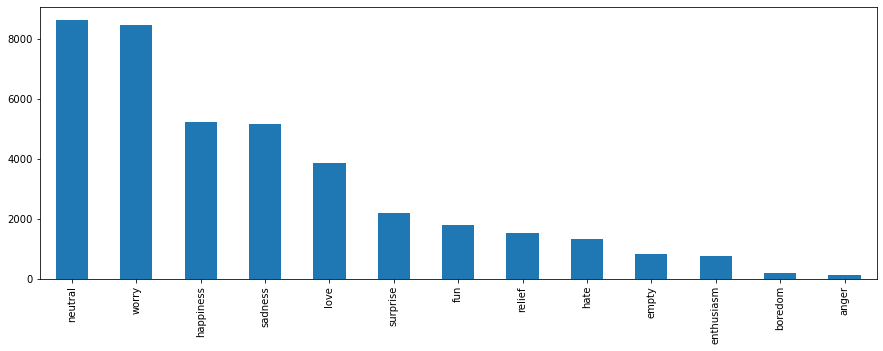

In [6]:
plt.figure(figsize=(15,5))
msg['sentiment'].value_counts().plot(kind='bar');

In [7]:
mp = msg['sentiment'].unique()
mp_sen = {'empty':1,'sadness':2, 'enthusiasm':3, 'neutral':4, 'worry':5,'surprise':6,
       'love':7, 'fun':8, 'hate':9, 'happiness':10,'boredom':11,'relief':12,'anger':13}
def func(s):
    return mp_sen[s]
msg['code_sent'] = msg['sentiment'].apply(func)
msg.head()


,tweet_id,sentiment,content,code_sent
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,1
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,2
2,1956967696,sadness,Funeral ceremony...gloomy friday...,2
3,1956967789,enthusiasm,wants to hang out with friends SOON!,3
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,4


In [8]:
#sentiment analysis

from textblob import TextBlob

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment>0:
        result="Positive"
    elif sentiment<0:
        result = "Negative"
    else:
        result="Neutral"
    return result

In [10]:
get_sentiment("i love coding")

'Positive'

In [11]:
msg['sentiment_s'] = msg['content'].apply(get_sentiment)

In [12]:
msg.head()

,tweet_id,sentiment,content,code_sent,sentiment_s
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,1,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,2,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,2,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,3,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,4,Neutral


In [13]:
msg.groupby(['sentiment','sentiment_s']).size()

sentiment   sentiment_s
anger       Negative         34
            Neutral          41
            Positive         35
boredom     Negative         80
            Neutral          56
            Positive         43
empty       Negative        168
            Neutral         418
            Positive        241
enthusiasm  Negative        100
            Neutral         254
            Positive        405
fun         Negative        205
            Neutral         474
            Positive       1097
happiness   Negative        345
            Neutral        1224
            Positive       3640
hate        Negative        694
            Neutral         364
            Positive        265
love        Negative        214
            Neutral         684
            Positive       2944
neutral     Negative       1156
            Neutral        4442
            Positive       3040
relief      Negative        207
            Neutral         477
            Positive        842
sadness     Nega

<AxesSubplot:xlabel='sentiment,sentiment_s'>

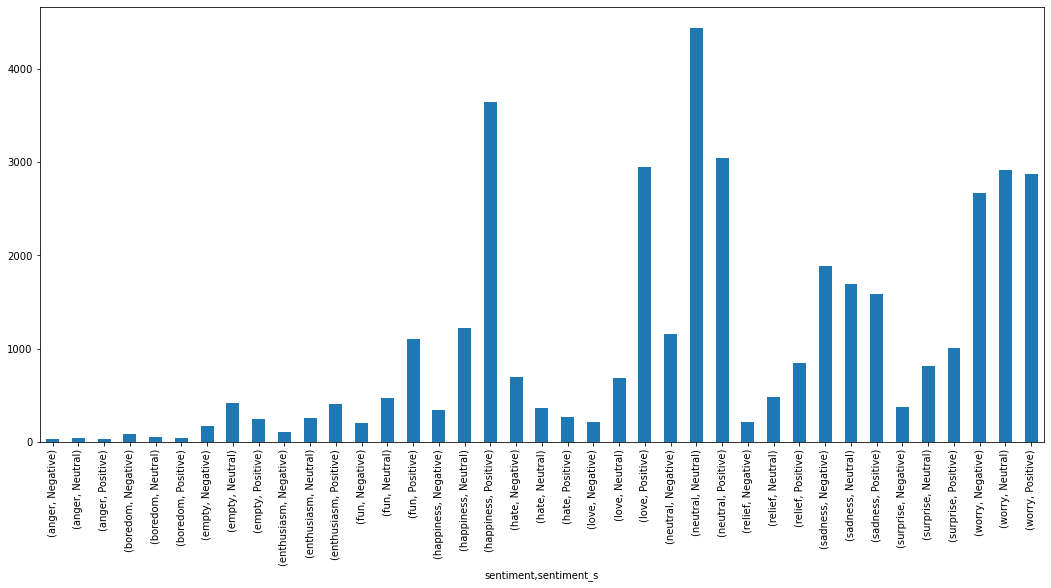

In [14]:
plt.figure(figsize=(18,8))
msg.groupby(['sentiment','sentiment_s']).size().plot(kind='bar')

In [15]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000024F20EDE670>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x576 with 0 Axes>

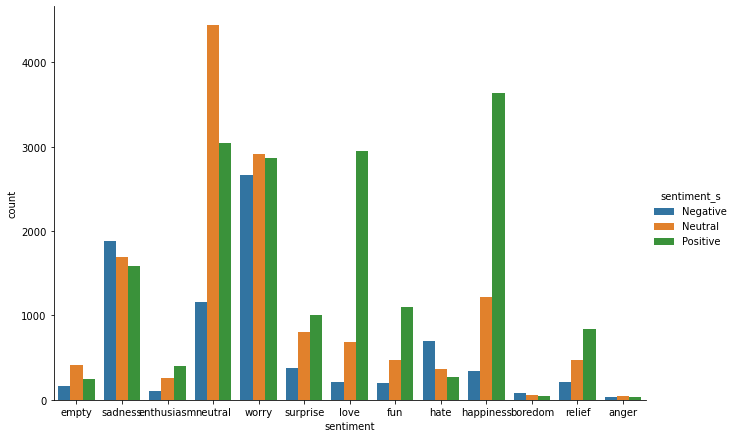

In [16]:
plt.figure(figsize=(18,8))
sns.factorplot(x='sentiment',hue='sentiment_s',data=msg,kind='count',size=6,aspect=1.5)

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x576 with 0 Axes>

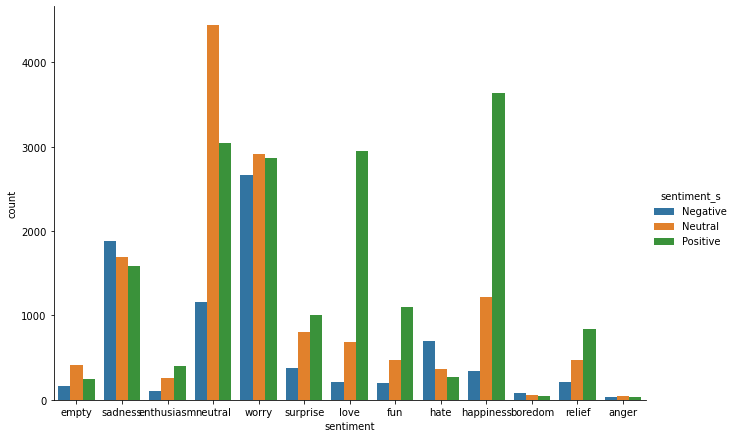

In [17]:
plt.figure(figsize=(18,8))
sns.catplot(x='sentiment',hue='sentiment_s',data=msg,kind='count',size=6,aspect=1.5)

### text cleaning
   Remove noice
   .. stopwords
   .. special characters
   .. punctuations and emojis

#keyword extraction

In [18]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
msg['clean_text'] = msg['content'].apply(nfx.remove_stopwords)

In [20]:
# from nltk.tokenize import TweetTokenizer
# tknzr = TweetTokenizer(strip_handles=True)
# msg['clean_text'] = msg['content'].apply(tknzr.tokenize)

In [21]:
msg['clean_text'] = msg['clean_text'].apply(nfx.remove_punctuations)

In [22]:
msg['clean_text'] = msg['clean_text'].apply(nfx.remove_userhandles)

In [23]:
msg[['content','clean_text']]

,content,clean_text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [24]:
from collections import Counter

In [25]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens= Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [26]:
emotion_list = msg['sentiment'].unique().tolist()

In [27]:
msg[msg['sentiment']== 'fun']['clean_text']

21       Wondering Im awake 7amwriting new songplotting...
41         lt3 gonna twitter ) cause amazing lol come c...
148                   RIP leonardo great mini fiddler crab
165                                 out memo looks amazing
179        OMG Ur alive LOL 2day gone sooo slow Im goin...
                               ...                        
39881                                       it :O im gonna
39897    Hyderabad Blues 2 mimicking American accent: a...
39930    8:30PM hit school tomorrow :O ahaha Ill stay t...
39931    sunny walk round lake morning met mother goose...
39973              good morning/midday nation FORMULA HOUR
Name: clean_text, Length: 1776, dtype: object

In [28]:
#extract keywords

In [29]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [30]:
fun_list = msg[msg['sentiment']=='fun']['clean_text'].tolist()

In [31]:
fun_docx = ' '.join(fun_list)
fun_docx

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore   lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab   out memo looks amazing   OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight   california vintage ahahah BEST dresses want dont ebay (    Umm yeah Thats probably pretty good note self eeeeeewwwwwwww   Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come   Lettuce amp spinach best cool weather live floridanot luck growing those   know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now   songs stay same Whats next Hmmm Careless whisper   dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw   hell yeah missed u nite lol u like opinion wish   burning trees trying dresses spent 2 hours playing TF2 think Im better started unn

In [32]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

In [33]:
keyword_fun = extract_keywords(fun_docx)

In [34]:
keyword_fun

{'fun': 128,
 'lol': 123,
 'Im': 119,
 'like': 100,
 'good': 90,
 'day': 84,
 'haha': 83,
 'going': 73,
 'im': 71,
 'u': 71,
 'got': 65,
 'think': 59,
 'amp': 58,
 'night': 58,
 'today': 56,
 'know': 54,
 'it': 53,
 'cant': 51,
 'time': 51,
 'great': 47,
 'tonight': 46,
 'love': 44,
 'want': 43,
 'wait': 43,
 '2': 42,
 'right': 42,
 'tomorrow': 41,
 'new': 40,
 'work': 39,
 'funny': 39,
 'gonna': 38,
 'Ill': 37,
 'LOL': 36,
 'yeah': 35,
 'nice': 35,
 'thats': 34,
 'now': 33,
 'home': 33,
 'look': 33,
 'me': 33,
 'cool': 30,
 'better': 30,
 'week': 30,
 'come': 29,
 'Ive': 29,
 'you': 29,
 'way': 29,
 'sleep': 29,
 'getting': 28,
 'morning': 28}

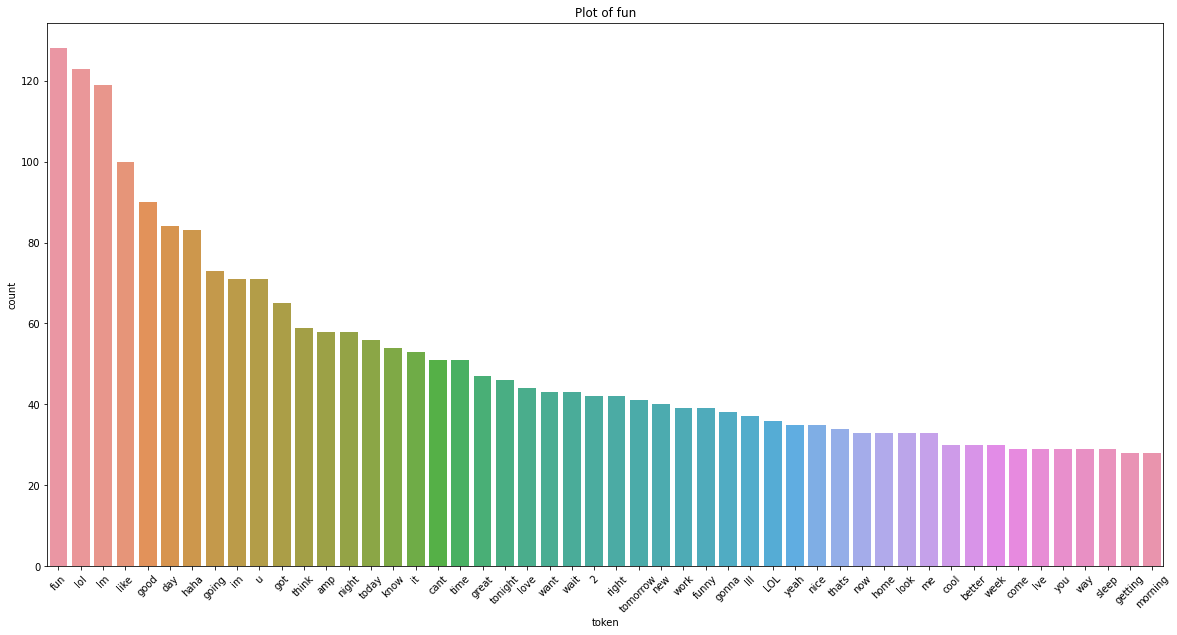

In [35]:
plot_most_common_words(keyword_fun,"fun")

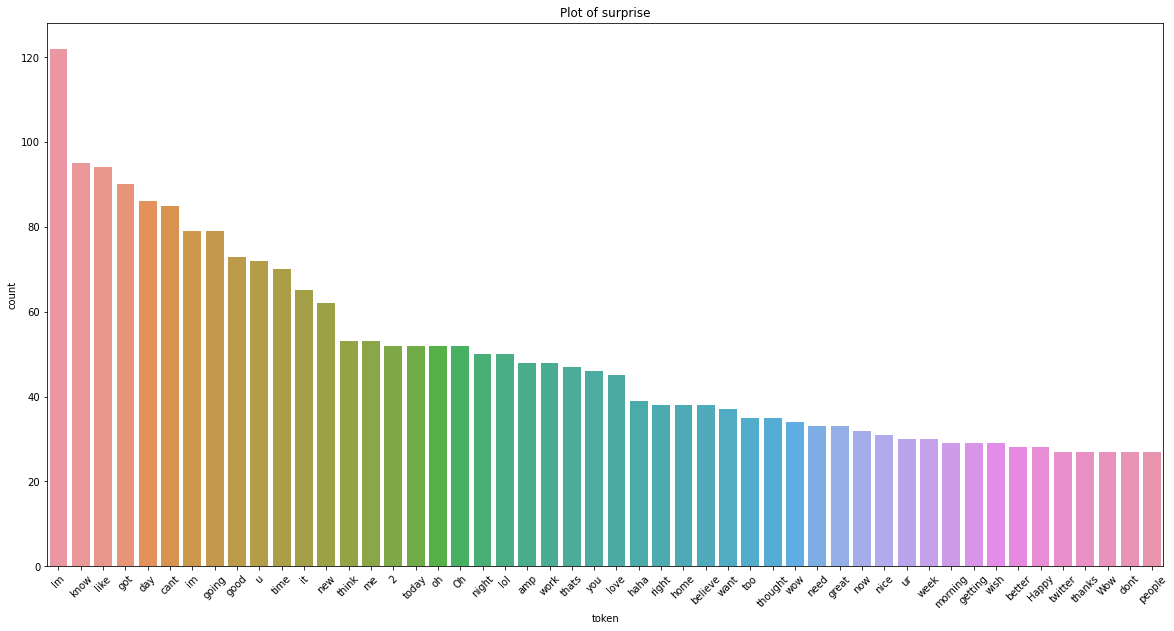

In [36]:
surprise_list = msg[msg['sentiment']=='surprise']['clean_text'].tolist()
surprise_docx = ' '.join(surprise_list)
surprise_docx

keyword_surprise = extract_keywords(surprise_docx)
plot_most_common_words(keyword_surprise,"surprise")


In [37]:
## word cloud

from wordcloud import WordCloud

In [38]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

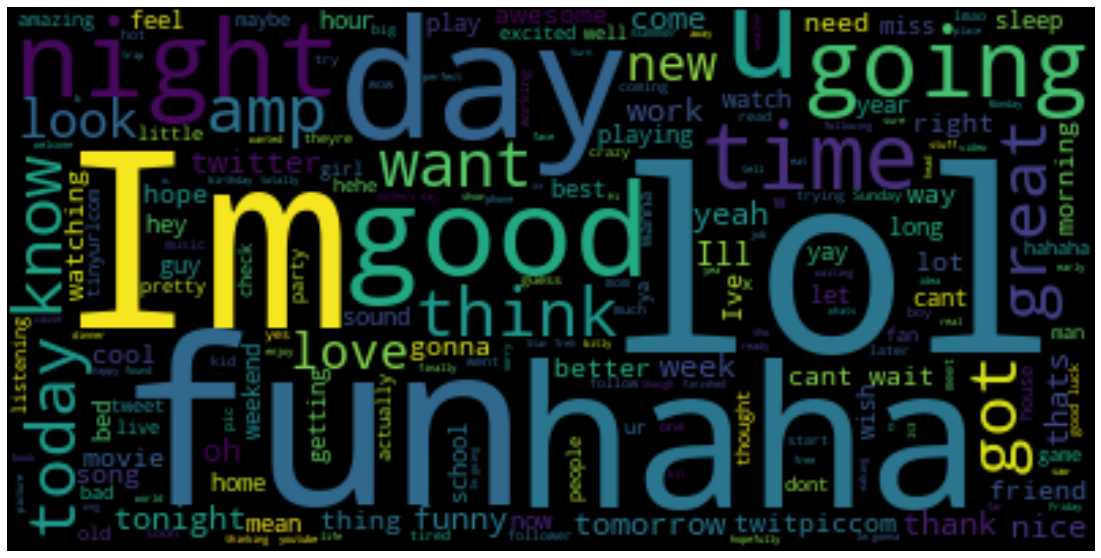

In [39]:
plot_wordcloud(fun_docx)

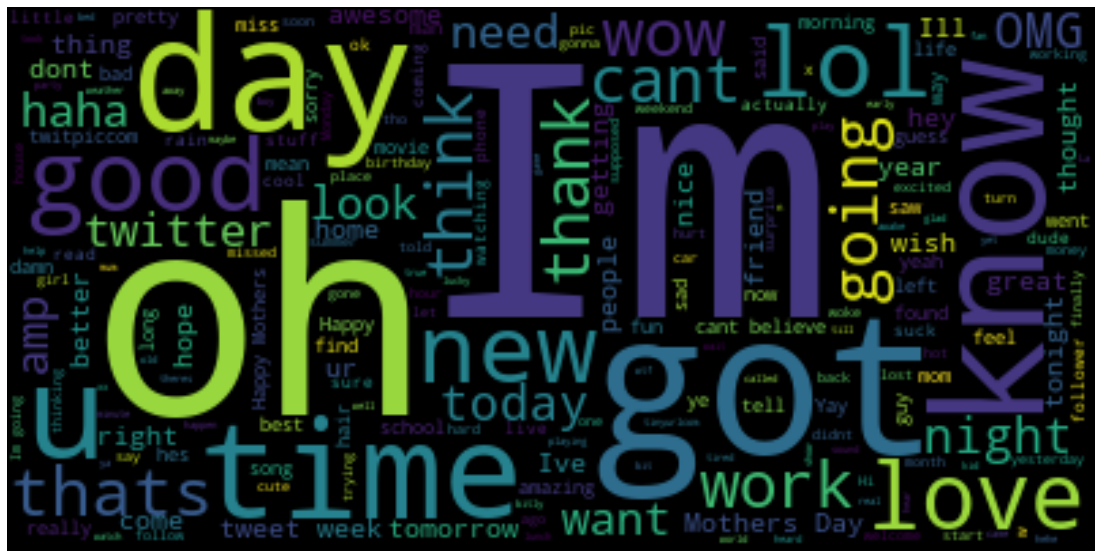

In [40]:
plot_wordcloud(surprise_docx)

# ml tools
logistic regression
knn
decision tree

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
## build features from text

In [44]:
Xfeatures = msg['clean_text']
ylabels = msg['sentiment']

In [45]:
cv= CountVectorizer()

In [46]:
#vectorizer
X=cv.fit_transform(Xfeatures)

In [47]:
#get feature by name
cv.get_feature_names()

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '006',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '050809',
 '053agj',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '0783l',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '0a7v3j',
 '0ayzyj',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0kenjoy',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415'

In [48]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

# build model

In [50]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [51]:
#accuracy
nv_model.score(X_test,y_test)

0.31575

In [52]:
#precision

y_pred_for_nv = nv_model.predict(X_test)

In [53]:
y_pred_for_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'neutral',
       'sadness'], dtype='<U10')

## make a single prediction
vectorized text
applied our model

In [83]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(msg['content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 48998 unique tokens.


In [84]:
from keras.preprocessing.text import Tokenizer
MAX_SEQUENCE_LENGTH = 250
# tokenizer = Tokenizer()
X = tokenizer.texts_to_sequences(msg['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (40000, 250)


In [85]:
Y = pd.get_dummies(msg['sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (40000, 13)


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28000, 250) (28000, 13)
(12000, 250) (12000, 13)


In [90]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
 66/394 [====>.........................] - ETA: 9:20 - loss: 2.2246 - accuracy: 0.2188

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
lr_model.score(X_test,y_test)

0.3328333333333333